# IS 4487 Assignment 9: Customer Segmentation with Clustering

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.

## 1. Setup and Load Data

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

- Import the necessary Python libraries
- Load the hotel bookings dataset by [downloading the file](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here) or using this link: https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv
- Display the first few rows

### In Your Response:
1. What stands out in the initial preview? Any columns or rows that seem unusual?

In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv"
hotels_df = pd.read_csv(url)

# Display the first few rows
display(hotels_df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### ✍️ Your Response: 🔧
1. There are some outliers in the dataset that i noticed such as 737 and 343 for the lead time.

## 2. Select and Prepare Features

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

- Choose 3–5 numeric features related to customer behavior
- Drop missing values if needed
- Standardize using `StandardScaler`

### In Your Response:
1. What features did you select and why?
2. What kinds of patterns or segments do you expect to find?


In [3]:
from sklearn.preprocessing import StandardScaler

# Select features
features = ['lead_time', 'stays_in_week_nights', 'total_of_special_requests']
X = hotels_df[features].copy()

# Drop missing values
X.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### ✍️ Your Response: 🔧
1. I selected lead_time, stays_in_week_nights, and total_of_special_requests becuase they represent key aspects of customer booking behavior that could help differentiate customer segments

2. I expect that a low lead_time and a low number of stays_in_week_nights could be signs of last minute travelers who booked on impulse


## 3. Apply K-Means Clustering

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

- Fit a `KMeans` model with your selected features
- Choose a value of `k` (e.g. 3, 4, or 5)
- Predict clusters and assign to each guest
- Visualize using a scatterplot of 2 features

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.

### In Your Response:
1. What `k` value did you choose, and how did you decide?
2. What types of customers seem to show up in the clusters?



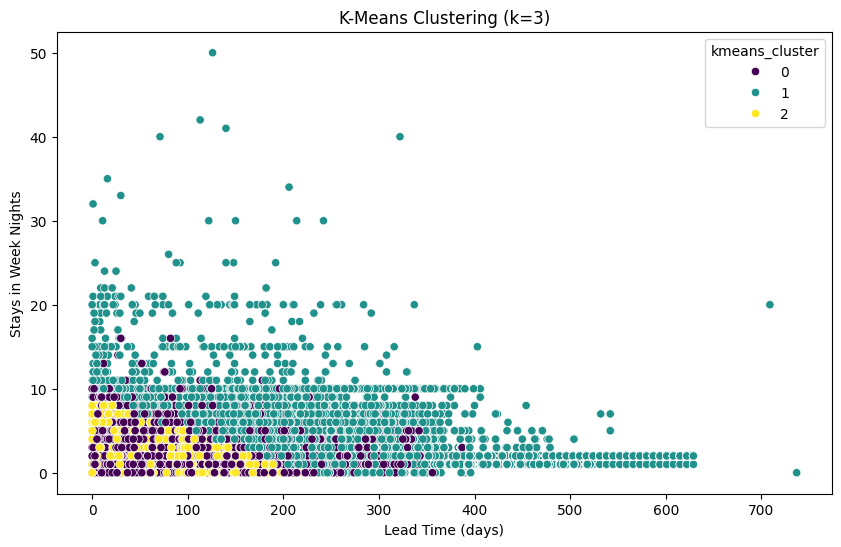

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Fit KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init to avoid warning
X_scaled_kmeans = X_scaled.copy()
kmeans_labels = kmeans.fit_predict(X_scaled_kmeans)

# Add cluster labels back to the original (non-scaled) DataFrame for visualization
X['kmeans_cluster'] = kmeans_labels

# Visualize the clusters using a scatterplot of two features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='lead_time', y='stays_in_week_nights', hue='kmeans_cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Lead Time (days)')
plt.ylabel('Stays in Week Nights')
plt.show()

### ✍️ Your Response: 🔧
1. I chose 3 for my K value becasue 3 provides a manageable number of clusters to interpret intially.

2. Cluster O appears to represent guests with moderate to high lead times and moderate to high stays in week nights, which might include business travelers on longer business trips. Cluster 1 is represented by very high lead times but very low stays in week nights. This could be for special occasions where guests book far ahead in time but only stay for special occasions. Cluster 2 is represented with guests with very low lead times and very low stays in week nights. This represents last minute bookers wuth very short stays which can be for emergency events or overnight layovers, etc.


## 4. Apply Gaussian Mixture Model (GMM)

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

- Fit a GMM with the same number of clusters you chose in Part 3
- Predict soft clusters (remember that soft clustering deals with probabilities, not labels)
- Visualize the GMM model so that you may compare it to the KMeans scatterplot

### In Your Response:
1. How did the GMM results compare to KMeans?
2. What business questions might GMM help answer better?


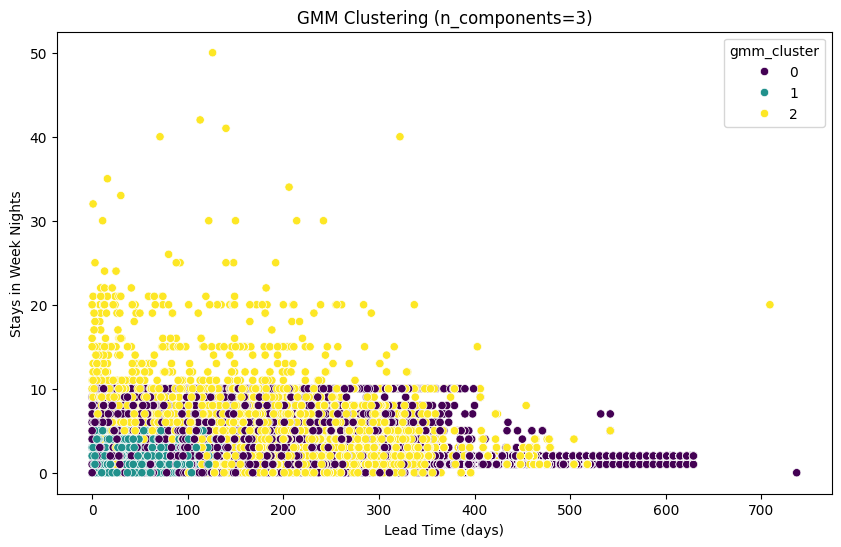

In [5]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fit GMM with the same number of clusters (k=3)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Predict the cluster for each data point (hard assignment for visualization)
gmm_labels = gmm.predict(X_scaled)

# Predict soft clusters (probabilities)
gmm_probs = gmm.predict_proba(X_scaled)

# Add GMM cluster labels back to the original (non-scaled) DataFrame for visualization
X['gmm_cluster'] = gmm_labels

# Visualize the GMM clusters using a scatterplot of two features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='lead_time', y='stays_in_week_nights', hue='gmm_cluster', palette='viridis', legend='full')
plt.title('GMM Clustering (n_components=3)')
plt.xlabel('Lead Time (days)')
plt.ylabel('Stays in Week Nights')
plt.show()

# You can also display the first few rows with GMM probabilities to see soft clusters
# display(pd.DataFrame(gmm_probs, columns=[f'GMM_Cluster_{i}_Prob' for i in range(gmm_probs.shape[1])]).head())

### ✍️ Your Response: 🔧
1. The GMM results show a similar general structure to the KMeans however GMM is more of a probabilistic model, which can capture more flexible cluster shapes and provides probabilites of belonging to each cluster rather than just hard assignments like KMeans which is useful when clusters overlap.

2. GMM is useful for answering questions where customrs belong to multiple types and where there isn't a clear cut boundary between customer segments. For example, a customer mught have a lead time typical of leisure travelers but a stay duration common for business trips, GMM can highlight these individuals.


## 5. Evaluate Your Models

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics.

- Calculate:
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index
- Compare both models

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering

### In Your Response:
1. Which model performed better on the metrics?
2. Would you recommend KMeans or GMM for a business analyst? Why?


In [6]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# WCSS for KMeans
wcss = kmeans.inertia_
print(f'KMeans WCSS: {wcss}')

# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'KMeans Silhouette Score: {silhouette_kmeans}')

# Davies-Bouldin Index for KMeans
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
print(f'KMeans Davies-Bouldin Index: {db_kmeans}')

print("-" * 30)

# Silhouette Score for GMM
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
print(f'GMM Silhouette Score: {silhouette_gmm}')

# Davies-Bouldin Index for GMM
db_gmm = davies_bouldin_score(X_scaled, gmm_labels)
print(f'GMM Davies-Bouldin Index: {db_gmm}')

KMeans WCSS: 193782.69270458806
KMeans Silhouette Score: 0.3384790636145799
KMeans Davies-Bouldin Index: 1.0895541507433213
------------------------------
GMM Silhouette Score: 0.26579265678509917
GMM Davies-Bouldin Index: 1.4870356622844607


### ✍️ Your Response: 🔧
1. KMeans Silhouette score is better and KMeans Davies-Bouldin Index is also better

2. I would recomment KMeans because it is simpler to understand and explain. KMeans is also less intensive and faster to run.


## 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

- Review characteristics of each cluster (e.g. average `lead_time`, `special_requests`)
- Think from a marketing or hotel operations perspective

### In Your Response:
1. What do the segments represent in terms of guest behavior?
2. How could the hotel tailor services or promotions to each group?


In [7]:
# Review characteristics of each KMeans cluster
cluster_characteristics = X.groupby('kmeans_cluster')[features].mean()
display(cluster_characteristics)

,lead_time,stays_in_week_nights,total_of_special_requests
kmeans_cluster,,,
0,63.392048,2.355663,1.438515
1,251.105692,3.610766,0.271217
2,53.233422,1.977528,0.000000


### ✍️ Your Response: 🔧
1. For cluster 2, the lead time was a lot higher than cluster o and 1. With a higher lead time, the nights stayed were also higher. This represents guests who are more serious and leads to more stayed nights.

2. For cluster 0 which has moderate lead times, moderate weeknight stays and high special requests, it seems that guests plan somewhat in advance and tend to stay for a few nights and make a significant number of special requests. I could provide promotion with services such as offer amenities catering to longer stays, laundry services, discounted extended parking, etc. For cluster 1 with very high lead times, low weeknight stays and low special requests, I would provide services such as quick check in and check out processes, as these are critical for short stays. I would provide early bird discounts for booking far in advance. For cluster 2 with very low lead time, very low weeknight stays and low special requests I would focus on last minute deals and make it a simple booking process, and offer quick meals for grab and go options.


## 7. Final Reflection

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### In Your Response:
1. What was most challenging about unsupervised learning?
2. When would you use clustering instead of supervised models?
3. How would you explain the value of clustering to a non-technical manager?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1. The most challenging aspects about unsupervised learning is the lack of labeled data. Evaluating the qualuty of the clusters was challenging.

2. When there is no labeled data and when you want to discover hidden patterns and structures.

3. Clustering is like a smart tool that hekps us sort these customers into different buckets based on their behaviors.

4. Its important to know how to find outliers and how to discover hidden patterns within the data. Sometimes the data is not labeled and placing this data into clusters is important to identify groups and make analysis on the groups.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [8]:
!jupyter nbconvert --to html "assignment_09_MillerAaron.ipynb"

[NbConvertApp] Converting notebook assignment_09_MillerAaron.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 702089 bytes to assignment_09_MillerAaron.html
